데이터 설명 : 집과 관련된 여러 수치들과 집의 가격, log1p 정규화된 price 컬럼 예측 하기

### 1. EDA 및 전처리

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('problem1.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB


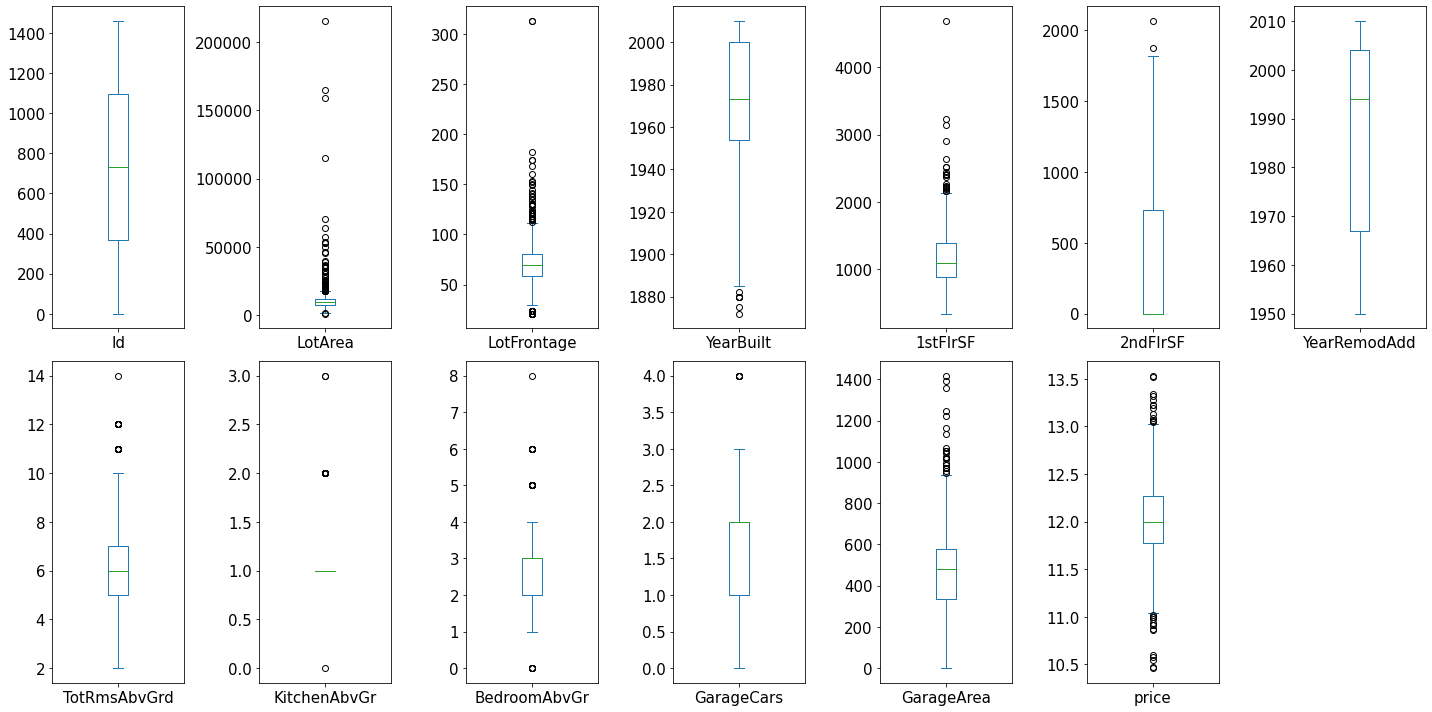

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
data.plot(kind='box', subplots=True, layout=(2,7), figsize=(20,10), fontsize=15)
plt.tight_layout()
plt.show()

### 2. Train,Valid,Test set으로 분할 및 시각화 제시

In [16]:
data2=data.copy()

data2=data2.rename(columns={'1stFlrSF':'first', '2ndFlrSF':'second'})


,Id,LotArea,LotFrontage,YearBuilt,first,second,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
0,1,8450,65.0,2003,856,854,2003,8,1,3,2,548,12.247699
1,2,9600,80.0,1976,1262,0,1976,6,1,3,2,460,12.109016
2,3,11250,68.0,2001,920,866,2002,6,1,3,2,608,12.317171
3,4,9550,60.0,1915,961,756,1970,7,1,3,3,642,11.849405
4,5,14260,84.0,2000,1145,1053,2000,9,1,4,3,836,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,62.0,1999,953,694,2000,7,1,3,2,460,12.072547
1456,1457,13175,85.0,1978,2073,0,1988,7,1,3,2,500,12.254868
1457,1458,9042,66.0,1941,1188,1152,2006,9,1,4,1,252,12.493133
1458,1459,9717,68.0,1950,1078,0,1996,5,1,2,1,240,11.864469


- 년도 데이터의 경우 최대년도 기준 몇년전인지 값으로 대체

In [19]:
#절댓값(지어진년도-지어진년도.max)
data2['YearBuilt']  = abs(data2['YearBuilt']-data2['YearBuilt'].max())
#절댓값(리모델링년도-리모델링년도.max)
data2['YearRemodAdd']  = abs(data2['YearRemodAdd']-data2['YearRemodAdd'].max())

In [20]:
X=data2.drop(columns=['Id', 'price', 'LotFrontage'])
y=data2['price']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X, y)

In [23]:
sc=StandardScaler()
sc.fit(X_train)

StandardScaler()

In [24]:
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

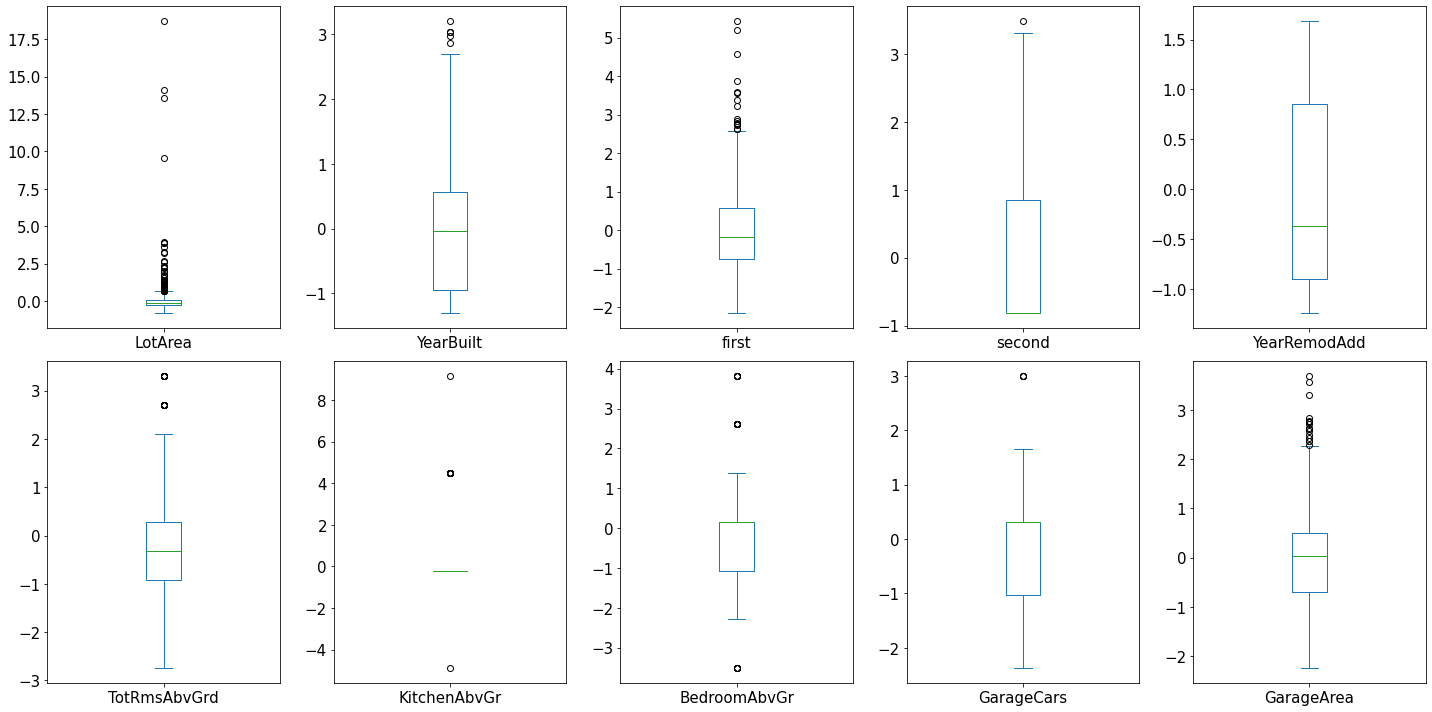

In [29]:
pd.DataFrame(X_train_sc, columns=X_train.columns).plot(kind='box', subplots=True, layout=(2,5), figsize=(20,10), fontsize=15)
plt.tight_layout()
plt.show()

↑ 회귀분석 시 스케일링 하지 않는 것이 r-squred 값이 더 높게 나옴

### 3. 2차 교호작용항 까지 고려한 회귀분석 수행 및 변수 선택 과정 제시

In [36]:
from itertools import permutations
#2차 교호작용항 컬럼 생성
comb=list(permutations(X_train.columns, 3))
len(comb)
comb

[('LotArea', 'YearBuilt', 'first'),
 ('LotArea', 'YearBuilt', 'second'),
 ('LotArea', 'YearBuilt', 'YearRemodAdd'),
 ('LotArea', 'YearBuilt', 'TotRmsAbvGrd'),
 ('LotArea', 'YearBuilt', 'KitchenAbvGr'),
 ('LotArea', 'YearBuilt', 'BedroomAbvGr'),
 ('LotArea', 'YearBuilt', 'GarageCars'),
 ('LotArea', 'YearBuilt', 'GarageArea'),
 ('LotArea', 'first', 'YearBuilt'),
 ('LotArea', 'first', 'second'),
 ('LotArea', 'first', 'YearRemodAdd'),
 ('LotArea', 'first', 'TotRmsAbvGrd'),
 ('LotArea', 'first', 'KitchenAbvGr'),
 ('LotArea', 'first', 'BedroomAbvGr'),
 ('LotArea', 'first', 'GarageCars'),
 ('LotArea', 'first', 'GarageArea'),
 ('LotArea', 'second', 'YearBuilt'),
 ('LotArea', 'second', 'first'),
 ('LotArea', 'second', 'YearRemodAdd'),
 ('LotArea', 'second', 'TotRmsAbvGrd'),
 ('LotArea', 'second', 'KitchenAbvGr'),
 ('LotArea', 'second', 'BedroomAbvGr'),
 ('LotArea', 'second', 'GarageCars'),
 ('LotArea', 'second', 'GarageArea'),
 ('LotArea', 'YearRemodAdd', 'YearBuilt'),
 ('LotArea', 'YearRemodAd

In [41]:
#':'로 붙임(?)
variables= '+ '.join(list(X_train.columns)) +'+'+ '+'.join([':'.join(list(y)) for y in comb]) 

In [34]:
from statsmodels.formula.api import ols

res=ols(f'price~{variables}', data=pd.concat([X_train, y_train], axis=1)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     55.33
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:35:03   Log-Likelihood:                 602.12
No. Observations:                1095   AIC:                            -942.2
Df Residuals:                     964   BIC:                            -287.4
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 11.1429      0.142     78.328      0.000      10.864      11.422
LotArea                                 1.098e-05    5.6e-06      1.962      0.050   -3.79e-09     2.2e-05
YearBuilt                                 -0.0032      0.001     -3.546      0.000      -0.005      -0.001
first                                      0.0009      0.000      7.146      0.000       0.001       0.001
second                                     0.0004      0.000      4.267      0.000       0.000       0.001
YearRemodAdd                           -2.135e-05      0.001     -0.015      0.988      -0.003       0.003
TotRmsAbvGrd                               0.0089      0.026      0.339      0.735      -0.043       0.060
KitchenAbvGr                              -0.2445      0.120     -2.043      0.041      -0.479      -0.010
BedroomAbvGr                              -0.0282      0.031     -0.909      0.364      -0.089       0.033
GarageCars                                 0.0221      0.071      0.310      0.756      -0.117       0.162
GarageArea                                 0.0004      0.000      1.595      0.111   -9.65e-05       0.001
LotArea:YearBuilt:first                 7.406e-11   2.32e-10      0.320      0.749   -3.81e-10    5.29e-10
LotArea:YearBuilt:second                3.239e-10   2.46e-10      1.317      0.188   -1.59e-10    8.07e-10
LotArea:YearBuilt:YearRemodAdd         -4.267e-09   3.39e-09     -1.259      0.208   -1.09e-08    2.38e-09
LotArea:YearBuilt:TotRmsAbvGrd         -7.704e-09    6.3e-08     -0.122      0.903   -1.31e-07    1.16e-07
LotArea:YearBuilt:KitchenAbvGr          1.133e-07   2.62e-07      0.433      0.665   -4.01e-07    6.27e-07
LotArea:YearBuilt:BedroomAbvGr         -5.181e-08   1.11e-07     -0.467      0.641   -2.69e-07    1.66e-07
LotArea:YearBuilt:GarageCars           -1.892e-07   1.88e-07     -1.008      0.314   -5.58e-07    1.79e-07
LotArea:YearBuilt:GarageArea            7.064e-10   6.31e-10      1.120      0.263   -5.32e-10    1.94e-09
LotArea:first:second                   -3.409e-11   1.02e-11     -3.335      0.001   -5.42e-11    -1.4e-11
LotArea:first:YearRemodAdd              -3.08e-10    2.9e-10     -1.061      0.289   -8.78e-10    2.62e-10
LotArea:first:TotRmsAbvGrd              1.028e-10   1.74e-09      0.059      0.953   -3.32e-09    3.52e-09
LotArea:first:KitchenAbvGr             -3.666e-09   1.85e-08     -0.198      0.843      -4e-08    3.27e-08
LotArea:first:BedroomAbvGr              5.978e-10   6.48e-09      0.092      0.927   -1.21e-08    1.33e-08
LotArea:first:GarageCars                3.631e-08   1.39e-08      2.621      0.009    9.13e-09    6.35e-08
LotArea:first:GarageArea               -1.163e-10   4.38e-11     -2.658      0.008   -2

### 4. 벌점(릿지, 랏소), 앙상블(랜덤포레스트)을 포함하여 모형에 적합한 기계학습 모델 3가지를 제시하라
(평가지표는 MSE, MAPE, R2 모두 확인할 것)

In [42]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred)/y_test))*100

In [45]:
ls=Lasso()
rd=Ridge()
rf=RandomForestRegressor()

def modelpipe(model):
    model.fit(X_train, y_train)
    model_pred=model.predict(X_test)
    mse=mean_squared_error(y_test, model_pred)
    r2score=r2_score(y_test, model_pred)
    mape=MAPE(y_test, model_pred)
    
    metrics=[mse, r2score, mape]
    return metrics

ls_result=modelpipe(ls)
rd_result=modelpipe(rd)
rf_result=modelpipe(rf)

result=pd.DataFrame([ls_result, rd_result, rf_result], columns=['mse', 'r2', 'mape'], index=['lasso', 'ridge', 'randomForest'])
result

,mse,r2,mape
lasso,0.054531,0.617736,1.153574
ridge,0.046537,0.673777,1.068300
randomForest,0.028158,0.802615,0.992574
